# <u>PART-A</u>: Using Scikit-learn library

In [284]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [285]:
import numpy as np
import pandas as pd

In [286]:
#Load Dataset
df=pd.read_csv('./hypothyroid.csv',na_values=['?'])
df.head(10)

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0
5,hypothyroid,85.0,F,f,f,f,f,f,f,f,f,138.0,1.1,27.0,1.19,23.0
6,hypothyroid,64.0,F,f,f,t,f,f,f,f,f,7.7,1.3,54.0,0.86,63.0
7,hypothyroid,72.0,F,f,f,f,f,f,f,f,f,21.0,1.9,34.0,1.05,32.0
8,hypothyroid,20.0,F,f,f,f,f,f,f,f,f,92.0,NaN,39.0,1.21,32.0
9,hypothyroid,42.0,F,f,f,f,f,f,f,f,f,48.0,NaN,7.6,1.02,7.5


In [287]:
df.shape

(3163, 16)

## Data Preprocessing

### Step 1: Are any data points missing? Check it using df.isna() method

In [288]:
df.isna().sum()

response                    0
age                       446
sex                        73
on_thyroxine                0
antithyroid_medication      0
thyroid_surgery             0
pregnant                    0
sick                        0
tumor                       0
lithium                     0
goitre                      0
TSH                       468
T3                        695
TT4                       249
T4U                       248
FTI                       247
dtype: int64

### Step 2: Use df.dropna() method to drop those missing rows

In [289]:
df = df.dropna()

In [290]:
df.shape

(2000, 16)

### Step 3: Creating a transformation function to convert + or - responses to 1 and 0

In [291]:
def class_convert(response):
    if response=='hypothyroid':
        return 1
    else:
        return 0

In [292]:
df['response']=df['response'].apply(class_convert)

In [293]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,1,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,1,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,1,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,1,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [294]:
df.dtypes

response                    int64
age                       float64
sex                        object
on_thyroxine               object
antithyroid_medication     object
thyroid_surgery            object
pregnant                   object
sick                       object
tumor                      object
lithium                    object
goitre                     object
TSH                       float64
T3                        float64
TT4                       float64
T4U                       float64
FTI                       float64
dtype: object

### Step 4: Create dummy variables for the categorical variables using get_dummies()

In [295]:
df_dummies = pd.get_dummies(df, columns=['sex','on_thyroxine','antithyroid_medication','thyroid_surgery','pregnant','sick','tumor','lithium','goitre'])

In [296]:
df_dummies.shape

(2000, 25)

In [297]:
df_dummies.sample(10)

,response,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,...,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t
477,0,33.0,0.00,1.8,93.0,0.97,96.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
2504,0,59.0,0.50,1.7,118.0,0.94,126.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2394,0,57.0,0.00,2.4,81.0,0.89,91.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
568,0,35.0,1.20,2.4,95.0,0.78,122.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1896,0,71.0,0.02,2.2,152.0,0.78,196.0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
3104,0,60.0,0.00,1.2,51.0,0.61,84.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2214,0,36.0,0.30,1.1,69.0,0.60,114.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
758,0,20.0,0.90,3.3,156.0,1.67,93.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1013,0,68.0,0.00,1.2,69.0,1.07,64.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2409,0,37.0,1.40,1.7,91.0,0.98,93.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


## EDA

### Step 1: Check for Class Balance

Class Split
0    1878
1     122
Name: response, dtype: int64


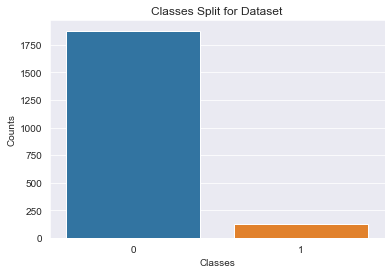

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Class Split')
print(df_dummies.response.value_counts())
sns.countplot(data=df_dummies,x='response').set(title='Classes Split for Dataset', xlabel='Classes',ylabel='Counts')
plt.show()

## Model Building

### Step 1: Preliminary steps for model building

In [299]:
#Define x and y variable
x = df_dummies.drop('response',axis=1).to_numpy()
y = df_dummies['response'].to_numpy()

# Create Train and Test Datasets with test_size=.30
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train, y_test = train_test_split(x, y, test_size=0.30,stratify=y,random_state=42)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train1)
X_test = sc.transform(x_test1)

In [300]:
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (1400, 24)
Test set shape (600, 24)


### Step 2: Build a classification model using LogisticRegression estimator from <u> Scikit-learn </u>

In [301]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                           max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='newton-cg', tol=0.001,
                           verbose=0, warm_start=False)
clf1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg', tol=0.001)

### Step 3: Find Intercept, coefficients, and score

In [302]:
print(f'Intercept: {clf1.intercept_}')
print(f'Coefficients: {clf1.coef_}')
print(f'Accuracy: {clf1.score(X_test,y_test)}')

Intercept: [-5.69597472]
Coefficients: [[ 0.77186067  1.40347246  0.04678591 -1.88307729  0.83474047 -3.30241311
  -0.11296004  0.11296004  0.19215136 -0.19215136  0.13037301 -0.13037301
   0.01135151 -0.01135151  0.22213122 -0.22213122  0.11096054 -0.11096054
   0.10856279 -0.10856279  0.08510105 -0.08510105 -0.02234262  0.02234262]]
Accuracy: 0.9633333333333334


### Step 4: Use the special <u>predict_proba</u> method to computes the raw probability values

In [303]:
prob_threshold = 0.5

In [304]:
prob_df=pd.DataFrame(clf1.predict_proba(X_test[:10]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

,Prob of NO,Prob of YES,Decision
0,0.999827,0.000173,0
1,0.999948,0.000052,0
2,0.997500,0.002500,0
3,0.999998,0.000002,0
4,0.994500,0.005500,0
5,0.819987,0.180013,0
6,0.950715,0.049285,0
7,0.004091,0.995909,1
8,0.999917,0.000083,0
9,0.999603,0.000397,0


In [305]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

## Model Evaluation

### Step 1: Classification report and confusion matrix

In [306]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf1.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       563
           1       0.64      0.92      0.76        37

    accuracy                           0.96       600
   macro avg       0.82      0.94      0.87       600
weighted avg       0.97      0.96      0.97       600



In [307]:
print(confusion_matrix(y_test,y_pred))

[[544  19]
 [  3  34]]


### Step 2: Plot the ROC Curve and report AUC

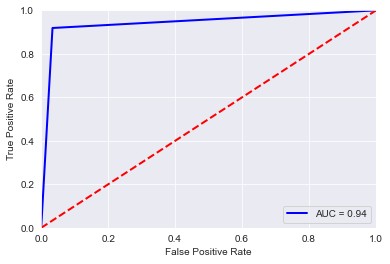

In [308]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
threshold = 0.5
y_score = (clf1.predict_proba(X_test)[:,1] > threshold).astype('float')
fpr,tpr, thresholds = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, color='blue', lw=2, label = 'AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

## Q. Is your problem a recall or precision problem? If so are you satisfied with your model performance?

Recall because we would rather get a false positive in identifying if a person has the disease rather than it going hidden from the person and it could develop into something worse

### Step 3: How does the confusion matrix change when we modulate the probability threshold?

In [309]:
from sklearn.metrics import classification_report, confusion_matrix
for prob_threshold in [0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred1=clf1.predict_proba(X_test)
    y_pred=y_pred1[:,1]>prob_threshold
    df=pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predict-NO','Predict-YES'],index=['NO','YES'])
    print("Confusion matrix for probability threshold {}".format(prob_threshold))
    print("-"*100)
    print(df)
    print()

Confusion matrix for probability threshold 0.3
----------------------------------------------------------------------------------------------------
     Predict-NO  Predict-YES
NO          530           33
YES           3           34

Confusion matrix for probability threshold 0.4
----------------------------------------------------------------------------------------------------
     Predict-NO  Predict-YES
NO          539           24
YES           3           34

Confusion matrix for probability threshold 0.5
----------------------------------------------------------------------------------------------------
     Predict-NO  Predict-YES
NO          544           19
YES           3           34

Confusion matrix for probability threshold 0.6
----------------------------------------------------------------------------------------------------
     Predict-NO  Predict-YES
NO          548           15
YES           3           34

Confusion matrix for probability threshold 0.7
---------

## Q. What would be the appropriate threshold based on the above observation?

The best for a recall problem would be a threshold of 0.3 as it has the lowest false negative rate therefore, we would minimally miss the undiagnosed people.

### Step 4: Perform Feature Selection using SelectFromModel

In [310]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=clf1)
selector.fit(X_train,y_train)
selector.get_support()

selection = df_dummies.drop('response', axis=1)
selection = list(selection.columns[selector.get_support()])
print('key features: ',selection)

key features:  ['age', 'TSH', 'TT4', 'T4U', 'FTI']


## Q. What are the key features according to the above result?

The key features are: 'age', 'TSH', 'TT4', 'T4U', 'FTI'

# ---------------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------------

# <u>PART-B</u>: Using statsmodels library

In [311]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [312]:
# use stats model on the same dataset
X_train_statmodels = df_dummies.drop(columns=['response'])
y_train_statmodels = df_dummies['response']

In [313]:
formula = "response ~ age + TSH + T3 + TT4 + T4U + FTI + sex_F + sex_M + on_thyroxine_f + on_thyroxine_t + antithyroid_medication_f + antithyroid_medication_t + thyroid_surgery_f + thyroid_surgery_t + pregnant_f + pregnant_t + sick_f + sick_t + tumor_f + tumor_t + lithium_f + lithium_t + goitre_f + goitre_t"

In [314]:
statmodel = smf.glm(formula,df_dummies,family=sm.families.Binomial())
print(statmodel.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -123.59
Date:                Thu, 16 Feb 2023   Deviance:                       247.17
Time:                        21:18:42   Pearson chi2:                 9.10e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Q. What is the interpretation of the coefficient value for age and FTI?

Age: 0.0219
FTI: -0.1420

one unit of change for age will increase the log odds of getting hyperthyroid by 0.0219 or by about 2% because it is positively correlated.
one unit of change for FTI will decrease the log odds of getting hyperthyroid by 0.1420 or by about 14% because it is negatively correlated.

## Q. According to stats model which are the statistically significant features?

a statistically significant feature would have a p value < 0.05 therefore, these are the features with significance:
statistically significant features: age:0.039, TSH:0.005, FTI:0.000

# ----------------------------------------------------------------------------------------------------------

## Q. Based on PART-A and PART-B provide your conclusion and recommendation of the dataset and the model build.

To improve our model I would recommend only using the statistically significant features for our dataset in order to efficiently increase the speed of our model and decrease the chance of over fitting. We would also use a probability threshold of 0.3 to improve the recall of our model so the model doesn't undiagnose any patients. According to the SelectFromModel the key features are: age, FTI, TSH, TT4, and T4U. According to the statsmodel the significant features are: age, TSH, and FTI. We could also down sample the data so that the class imbalance of hyperthyroid and no-hyperthyroid class in the target feature(response) would be more balanced.

# --------------------------------------------------------------------------------------------------------

# <u>PART-C</u>: Based on the learning from Part-A and B build a new logistic regression model pipeline and evaluate the model.

In [315]:
#Creating new logistic regression pipeline
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [316]:
#To balance the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42, n_jobs=-1)

X_resample,y_resample = smote.fit_resample(df_dummies.drop(columns=['response']),df_dummies['response'])
df_resample = pd.concat([pd.DataFrame(y_resample), pd.DataFrame(X_resample)], axis=1)
df_resample.columns = df_dummies.columns

C:\Users\xxryk\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


0    1878
1    1878
Name: response, dtype: int64

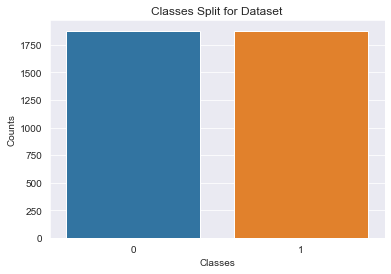

In [317]:
#Now it has an even amount of responses
sns.countplot(data=df_resample, x='response').set(title='Classes Split for Dataset', xlabel='Classes',ylabel='Counts')
df_resample.response.value_counts()

In [318]:
#Only selecting key features
X = df_resample[['age', 'FTI', 'TSH', 'TT4', 'T4U']]
y = df_resample['response']

In [319]:
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X, y, test_size=0.30,stratify=y,random_state=42)

In [320]:
pipeline.fit(X_train_resample,y_train_resample)
# y_pred_resample = pipeline.predict(X_test_resample)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [321]:
#Optimizing for recall
threshold = 0.3
y_pred_resample = (pipeline.predict_proba(X_test_resample)[:, 1] > threshold).astype('float')
confusion_matrix(y_test_resample, y_pred_resample)
df=pd.DataFrame(confusion_matrix(y_test_resample, y_pred_resample),columns=['Predict-NO','Predict-YES'],index=['NO','YES'])
print(df)

     Predict-NO  Predict-YES
NO          525           39
YES           6          557


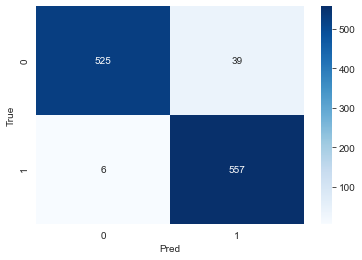

In [322]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test_resample, y_pred_resample, labels=pipeline.classes_)
sn.heatmap(cm,cmap="Blues", annot=True,fmt='g')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [323]:
print(classification_report(y_test_resample,y_pred_resample))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       564
           1       0.93      0.99      0.96       563

    accuracy                           0.96      1127
   macro avg       0.96      0.96      0.96      1127
weighted avg       0.96      0.96      0.96      1127



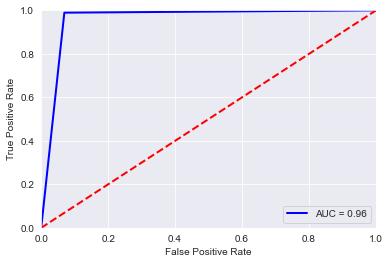

In [324]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
threshold = 0.3
y_score = (pipeline.predict_proba(X_test_resample)[:, 1] > threshold).astype('float')
fpr,tpr, thresholds = roc_curve(y_test_resample, y_score)

plt.plot(fpr, tpr, color='blue', lw=2, label = 'AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

After using SMOTE to balance our data and optimizing our threshold for recall, we managed to increase our AUC from 0.94 to 0.96